### 调用sklearn中决策树算法，调节参数观察决策边界的变化。
note:sklearn中的决策树算法使用CART。

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [17]:
## 样本数据的生成
X,y=make_moons(noise=0.23,random_state=888)

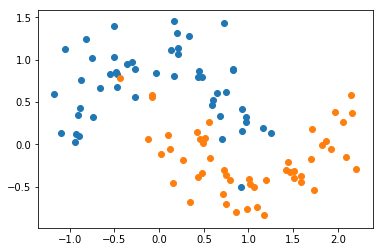

In [18]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [19]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

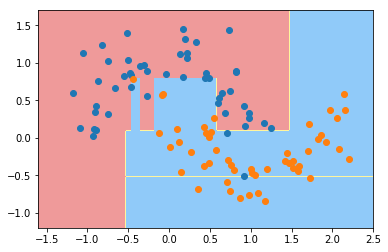

In [26]:
tree_classifier=DecisionTreeClassifier()
tree_classifier.fit(X,y)
plot_decision_boundary(tree_classifier,axis=[-1.6,2.5,-1.2,1.7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 接口参数：
>class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

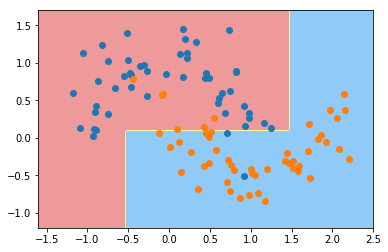

In [27]:
###控制树的深度
tree_classifier=DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X,y)
plot_decision_boundary(tree_classifier,axis=[-1.6,2.5,-1.2,1.7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

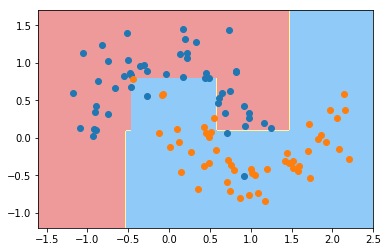

In [31]:
#控制决策树的叶子结点的个数
tree_classifier=DecisionTreeClassifier(max_leaf_nodes=7)
tree_classifier.fit(X,y)
plot_decision_boundary(tree_classifier,axis=[-1.6,2.5,-1.2,1.7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

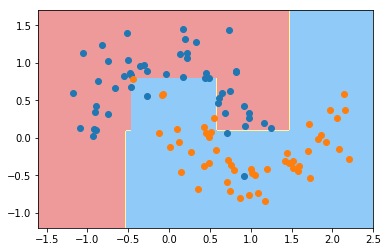

In [32]:
#控制决策树:一个节点最少有10个样本才可能继续往下分
tree_classifier=DecisionTreeClassifier(min_samples_split=10)
tree_classifier.fit(X,y)
plot_decision_boundary(tree_classifier,axis=[-1.6,2.5,-1.2,1.7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

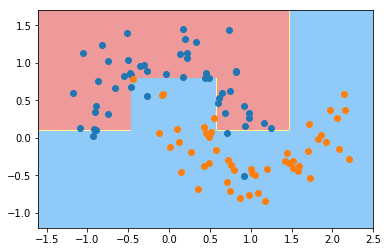

In [36]:
# 叶子结点至少要有多少个样本
tree_classifier=DecisionTreeClassifier(min_samples_leaf=5)
tree_classifier.fit(X,y)
plot_decision_boundary(tree_classifier,axis=[-1.6,2.5,-1.2,1.7])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

#### 决策树的局限性：
- 高度依赖样本数据（没有对样本数据进行任何假设，属于非参数学习），容易形成高方差。
- 决策边界是横平竖直的。

### sklearn中决策树算法解决回归问题

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

In [40]:
original_data=load_boston()
X,y=original_data.data,original_data.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [41]:
print X_train.shape
print y_train.shape

(379L, 13L)
(379L,)


In [45]:
## 在不对决策树进行任何限制的情况下，决策树是过拟合的
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_reg.score(X_train,y_train)


1.0

In [46]:
tree_reg.score(X_test,y_test)

0.78690410950286782

### 绘制决策树算法的学习曲线

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


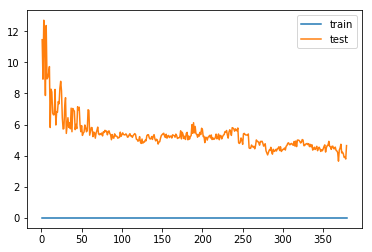

In [17]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

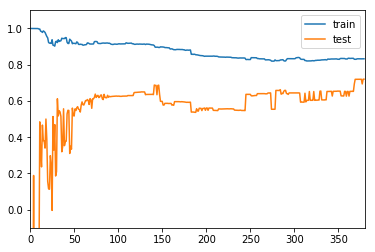

In [19]:
def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               train_score, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()
    
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

### 绘制决策树算法的模型复杂度曲线

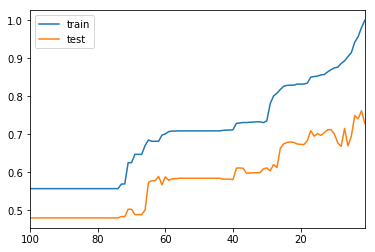

In [44]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(100, 1)
plt.legend()
plt.show()

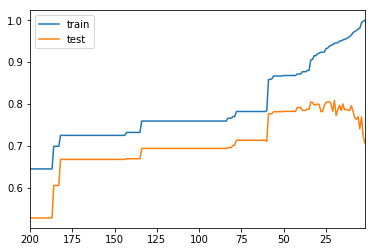

In [46]:
maxSamplesSplit = 200
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
plt.xlim(maxSamplesSplit, 2)
plt.legend()
plt.show()